# Different classification models

In [88]:
# !pip install opendatasets

In [89]:
# !pip install requests
# !pip install tabulate
# !pip install future
# !pip install matplotlib

In [90]:
# !pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

In [91]:
# !pip install h2o

In [92]:
import opendatasets as od
import pandas
  
od.download(
    "https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction")

Skipping, found downloaded files in "./heart-failure-prediction" (use force=True to force download)


In [93]:
!ls

Group_project_HXD220000_MXB220061_KXV220007_MXS220057.Rmd
Group_project_HXD220000_MXB220061_KXV220007_MXS220057.html
HeartDiseaseGroupProject.ipynb
Project Outline.pdf
Research question.docx
ggpairs_data.png
ggpairs_hd_data.png
heart-failure-prediction
heart.csv


In [94]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,20 hours 53 mins
H2O_cluster_timezone:,America/Chicago
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.3
H2O_cluster_version_age:,18 days
H2O_cluster_name:,H2O_from_python_harikrishnadev_nhskv3
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.162 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [95]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score
%matplotlib inline

In [96]:
df = pd.read_csv("heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [97]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


<Axes: >

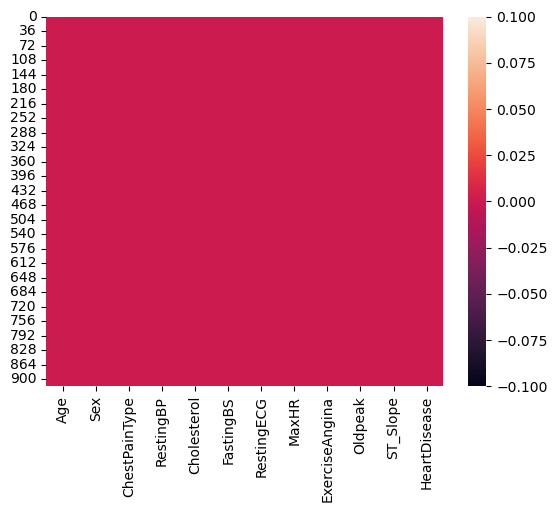

In [98]:
sns.heatmap(df.isnull())

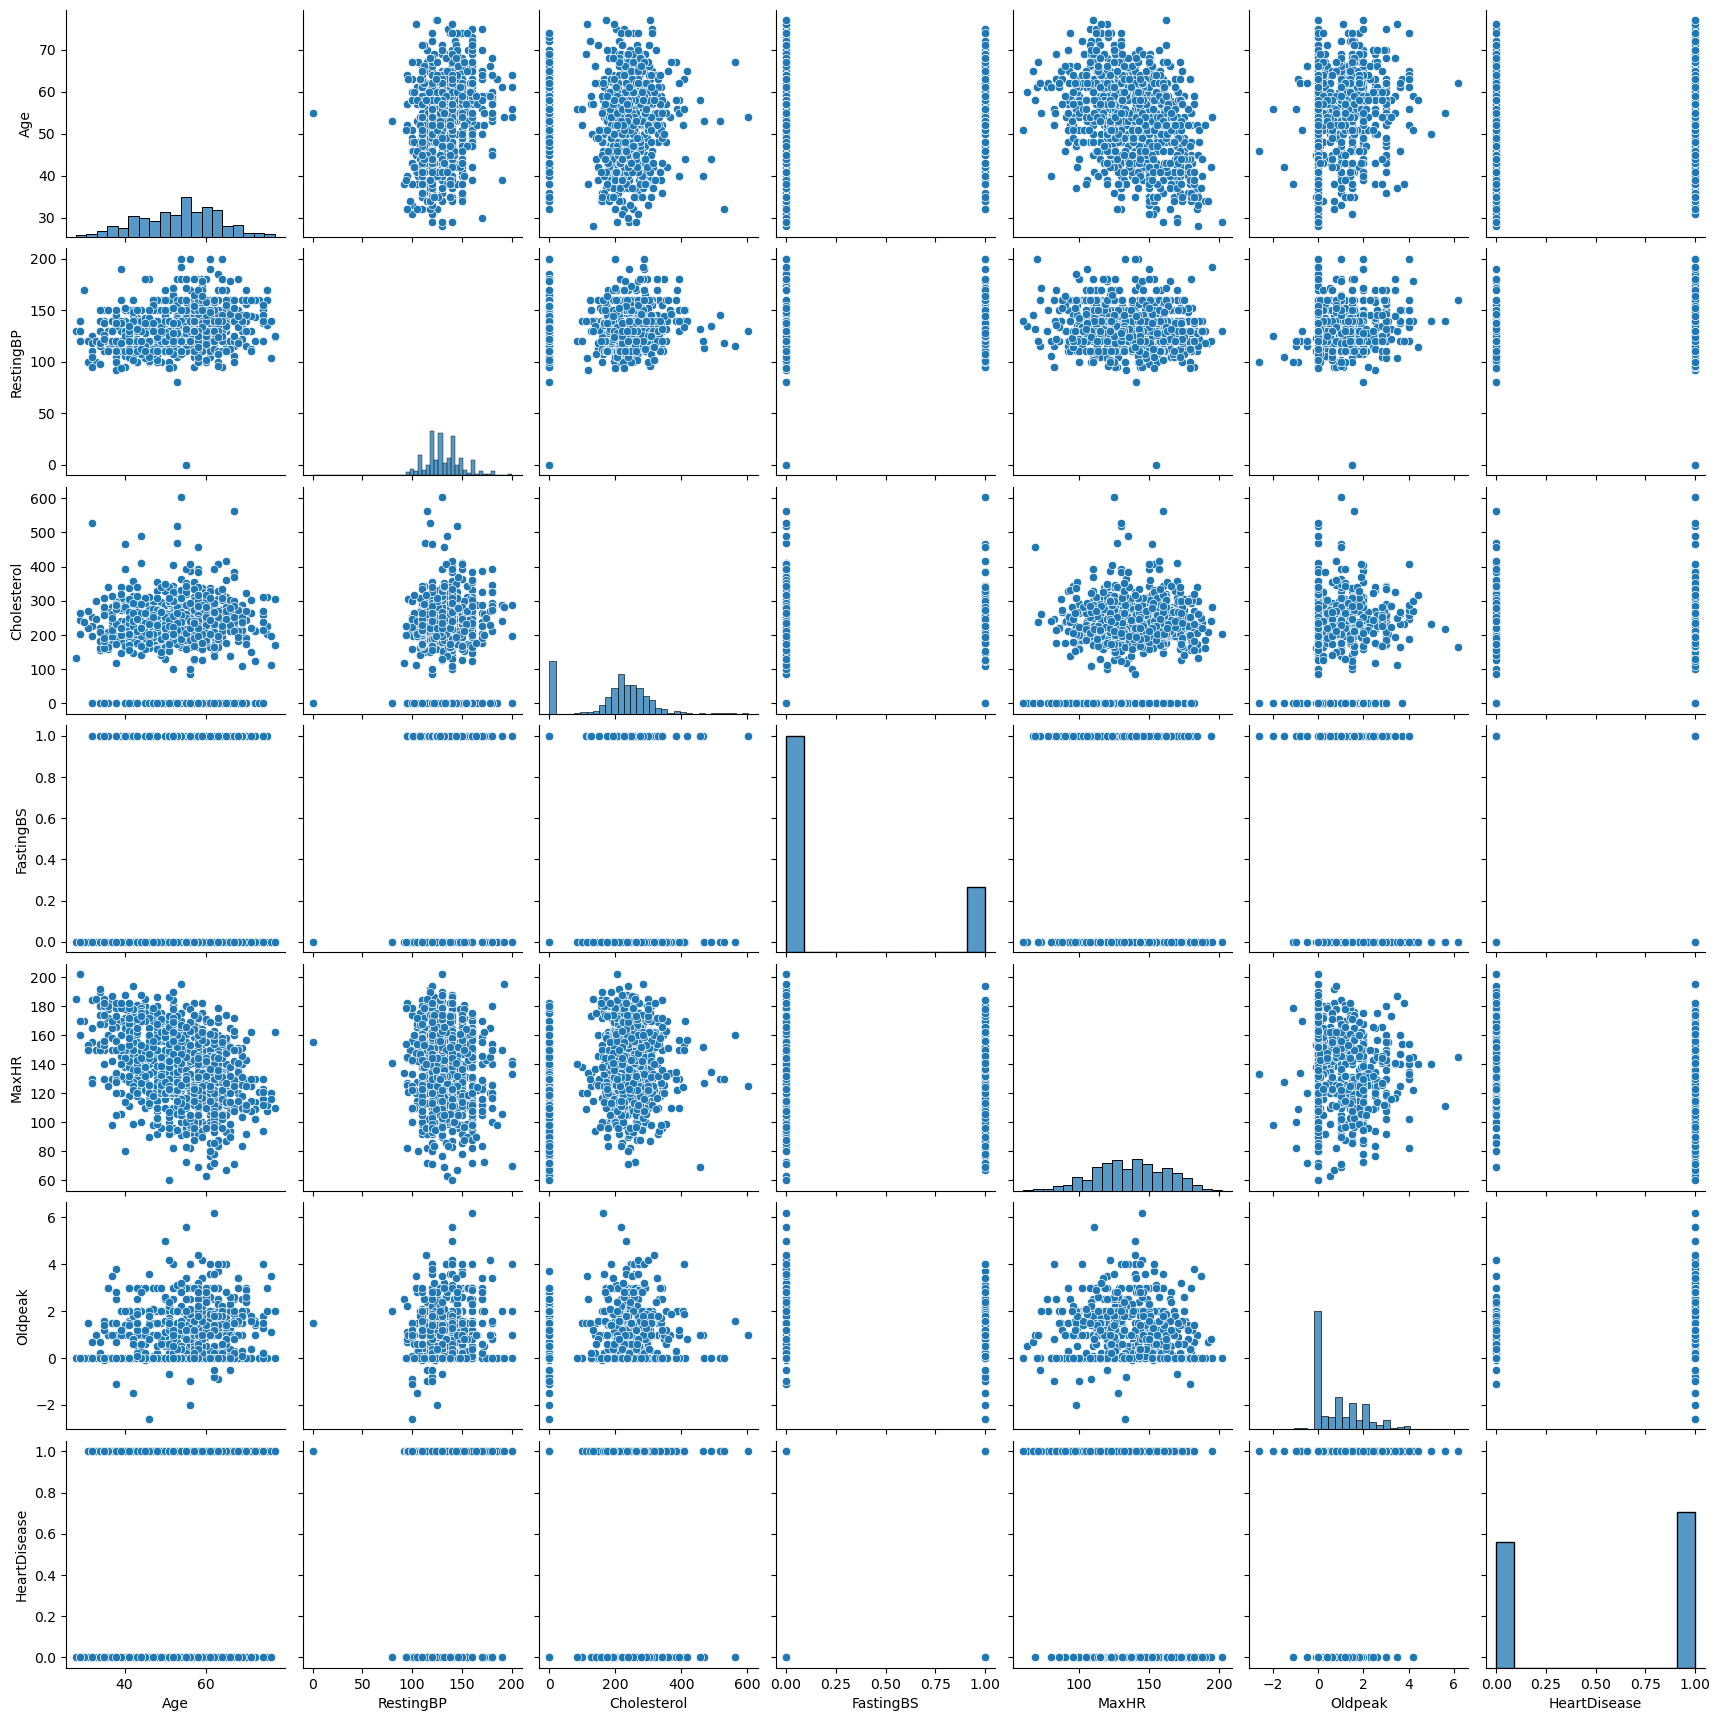

In [99]:
sns.pairplot(df)

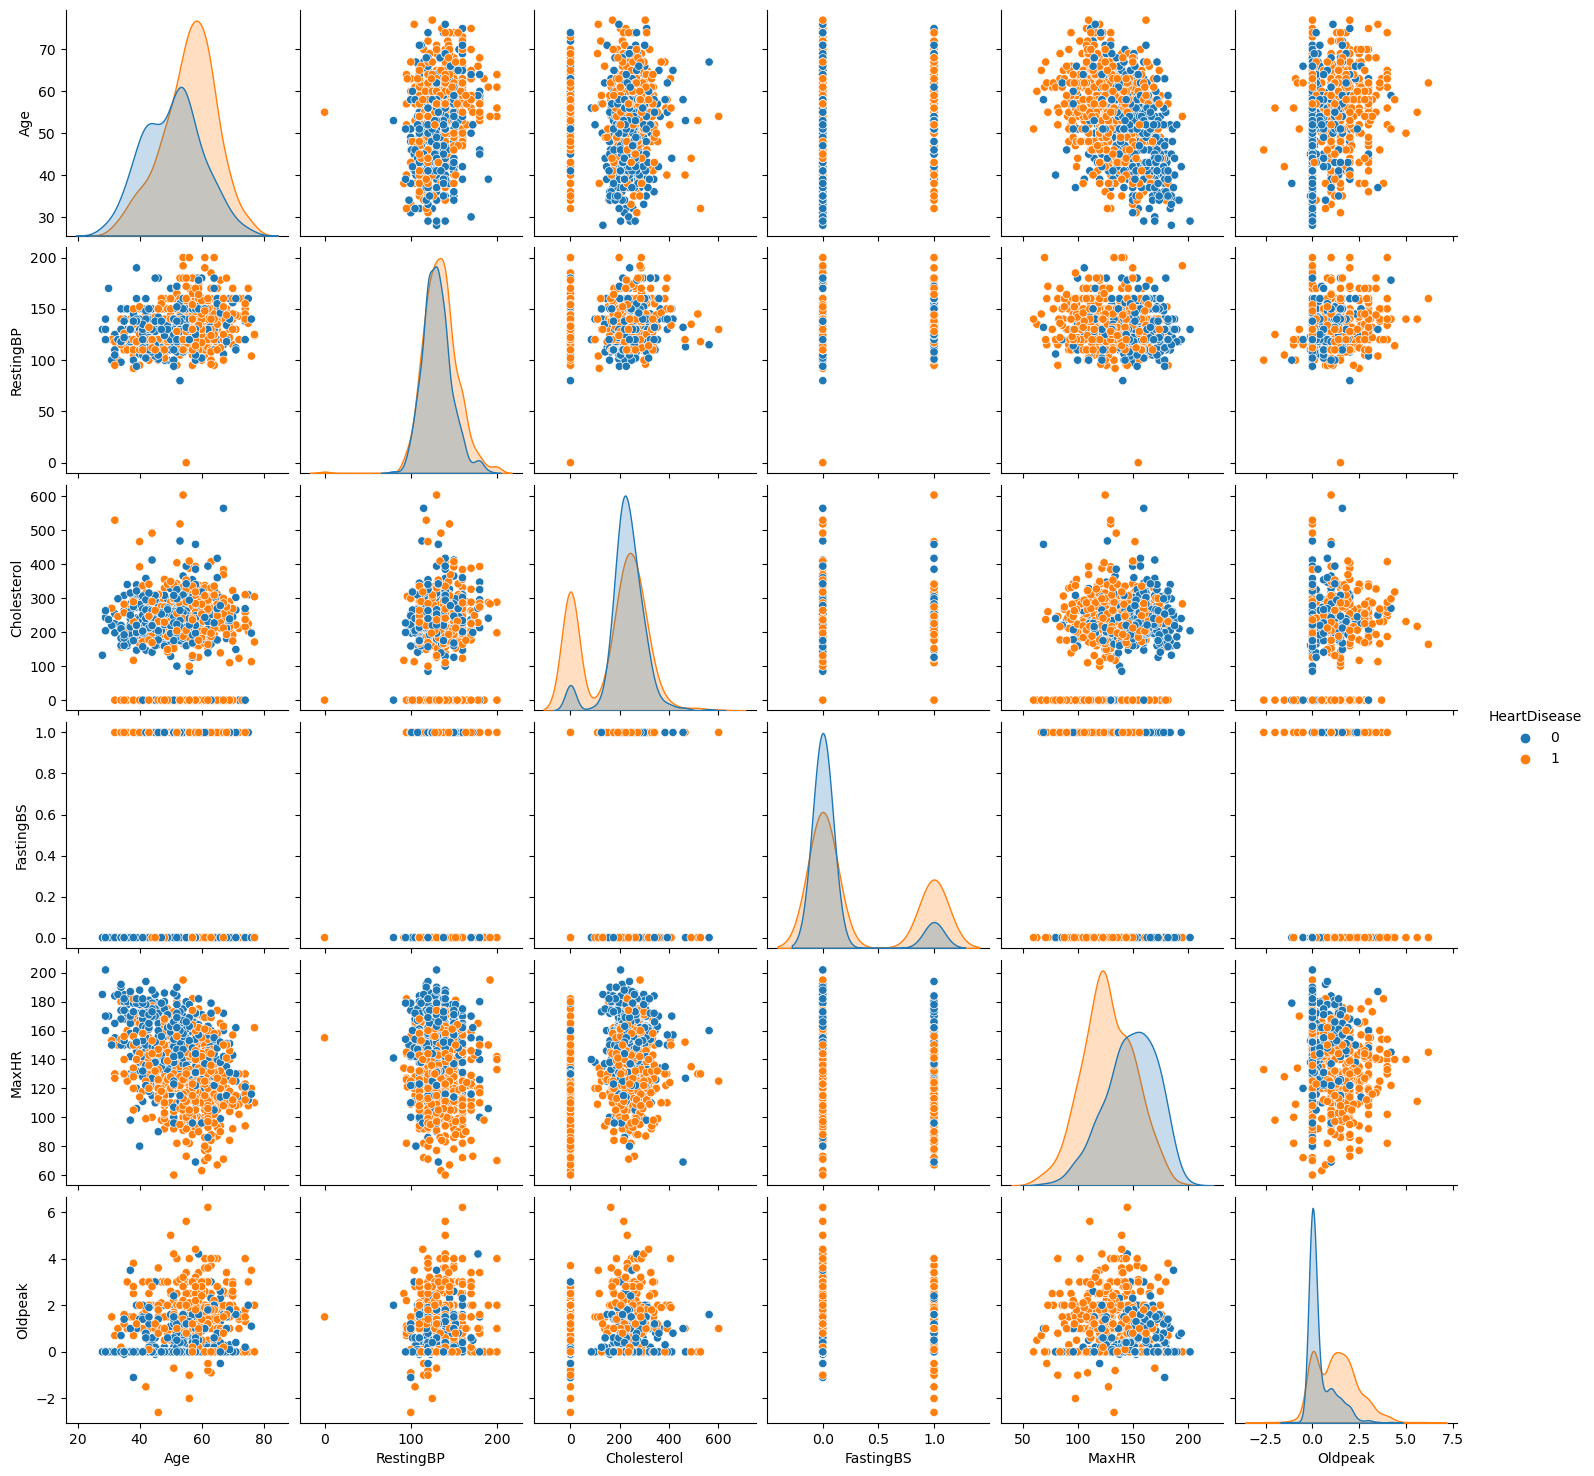

In [100]:
sns.pairplot(df,hue="HeartDisease")

/var/folders/3d/fk1zpy415g31bg07yrkc5qbm0000gn/T/ipykernel_39124/4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

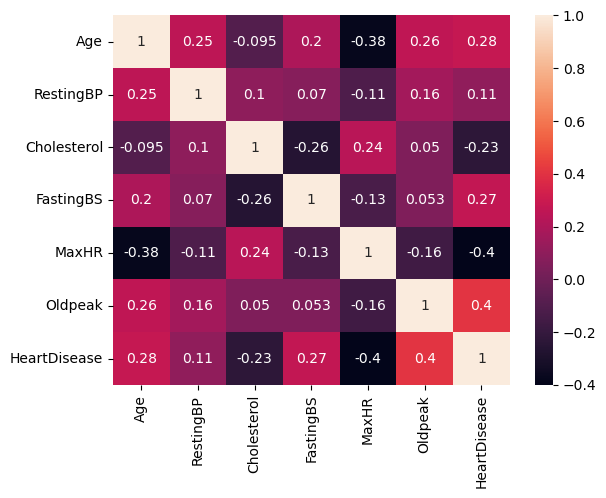

In [101]:
sns.heatmap(df.corr(),annot=True)

In [102]:
categorical_features = ["Sex","ChestPainType", "FastingBS", "RestingECG" ,"ExerciseAngina", "ST_Slope", "HeartDisease"]
numerical_features = ["Age" ,"RestingBP" ,"Cholesterol", "MaxHR" ,"Oldpeak"]

In [103]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# df1 = df.copy(deep = True)
df['Sex'] = le.fit_transform(df['Sex'])
df['ChestPainType'] = le.fit_transform(df['ChestPainType'])
df['RestingECG'] = le.fit_transform(df['RestingECG'])
df['ExerciseAngina'] = le.fit_transform(df['ExerciseAngina'])
df['ST_Slope'] = le.fit_transform(df['ST_Slope'])

/Users/harikrishnadev/Library/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


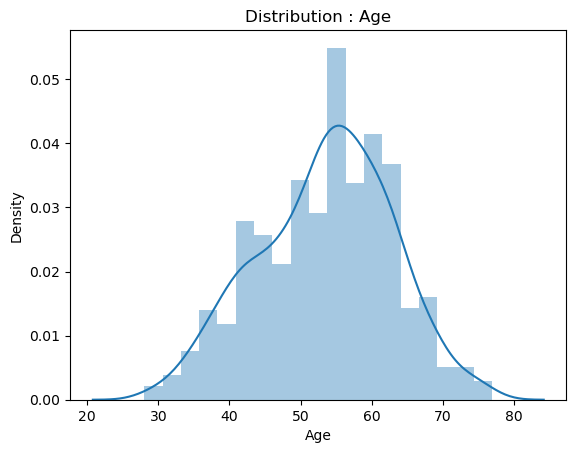

/Users/harikrishnadev/Library/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


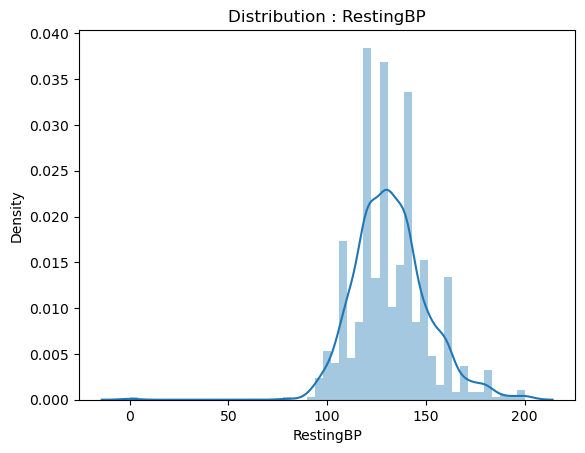

/Users/harikrishnadev/Library/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


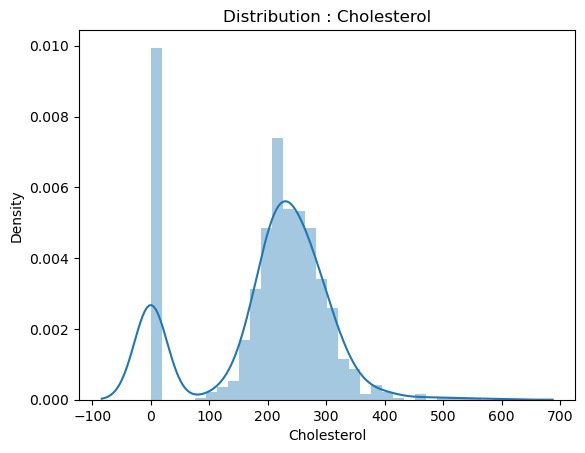

/Users/harikrishnadev/Library/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


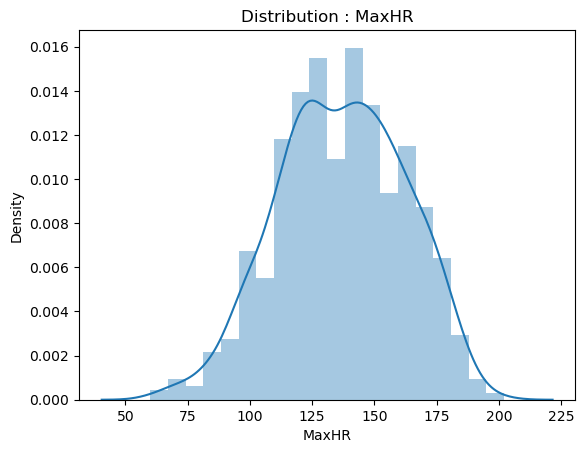

In [104]:
for i in range(len(numerical_features) - 1):
    sns.distplot(df[numerical_features[i]])
    title = 'Distribution : ' + numerical_features[i]
    plt.title(title)
    plt.show()

In [105]:
df = df[df.Cholesterol != 0]

/Users/harikrishnadev/Library/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


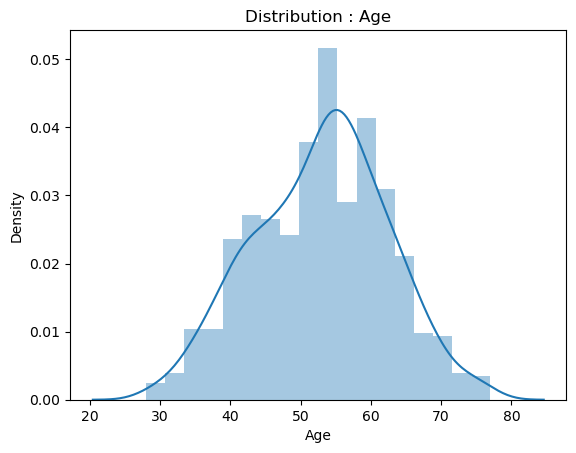

/Users/harikrishnadev/Library/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


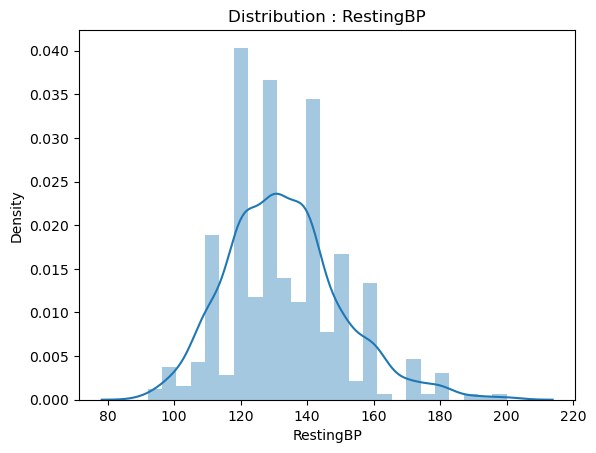

/Users/harikrishnadev/Library/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


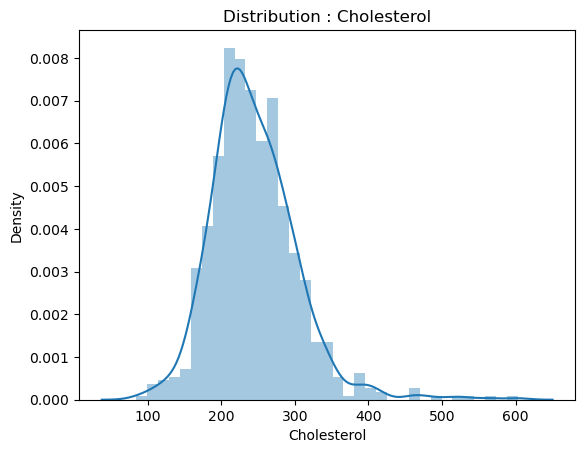

/Users/harikrishnadev/Library/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


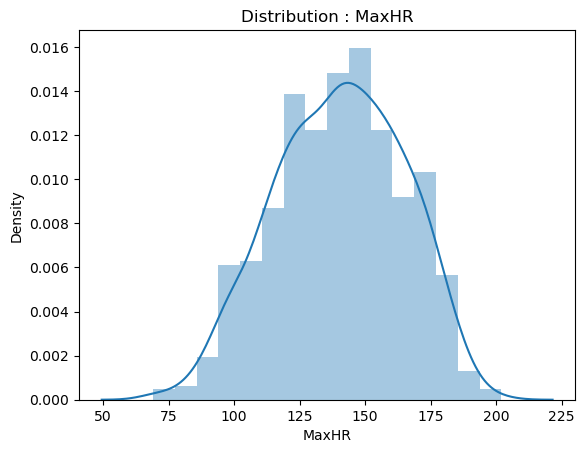

In [106]:
for i in range(len(numerical_features) - 1):
    sns.distplot(df[numerical_features[i]])
    title = 'Distribution : ' + numerical_features[i]
    plt.title(title)
    plt.show()

In [107]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
features = df1.loc[:,categorical_features[:-1]]
target = df1.loc[:,categorical_features[-1]]

best_features = SelectKBest(score_func = chi2,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['Chi Squared Score']) 
featureScores.sort_values(by="Chi Squared Score")

,Chi Squared Score
RestingECG,1.218136
Sex,18.006243
FastingBS,50.296983
ST_Slope,77.486680
ExerciseAngina,133.640134
ChestPainType,160.736878


In [108]:
from sklearn.feature_selection import f_classif

features = df1.loc[:,numerical_features]
target = df1.loc[:,categorical_features[-1]]

best_features = SelectKBest(score_func = f_classif,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['ANOVA Score']) 
featureScores.sort_values(by="ANOVA Score")

,ANOVA Score
RestingBP,10.727228
Cholesterol,52.459725
Age,79.160779
MaxHR,174.913585
Oldpeak,178.615120


In [109]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
mms = MinMaxScaler() # Normalization
ss = StandardScaler() # Standardization

df['Oldpeak'] = mms.fit_transform(df[['Oldpeak']])
df['Age'] = ss.fit_transform(df[['Age']])
df['RestingBP'] = ss.fit_transform(df[['RestingBP']])
df['Cholesterol'] = ss.fit_transform(df[['Cholesterol']])
df['MaxHR'] = ss.fit_transform(df[['MaxHR']])
df.head()

/var/folders/3d/fk1zpy415g31bg07yrkc5qbm0000gn/T/ipykernel_39124/1195259092.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Oldpeak'] = mms.fit_transform(df[['Oldpeak']])
/var/folders/3d/fk1zpy415g31bg07yrkc5qbm0000gn/T/ipykernel_39124/1195259092.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'] = ss.fit_transform(df[['Age']])
/var/folders/3d/fk1zpy415g31bg07yrkc5qbm0000gn/T/ipykernel_39124/1195259092.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,-1.356073,1,1,0.403980,0.750494,0,1,1.296470,0,0.015873,2,0
1,-0.408656,0,2,1.561980,-1.093405,0,1,0.643613,0,0.174603,1,1
2,-1.671879,1,1,-0.175019,0.648995,0,2,-1.722993,0,0.015873,2,0
3,-0.513925,0,0,0.288180,-0.518244,0,1,-1.314958,1,0.253968,1,1
4,0.117686,1,2,0.982980,-0.839657,0,1,-0.743708,0,0.015873,2,0


In [110]:
from h2o.automl import H2OAutoML

In [111]:
df = h2o.H2OFrame(df)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [112]:
train, test = df.split_frame(ratios=[0.8], seed = 1)

In [113]:
x = df.columns
y = "HeartDisease"
x = x.remove(y)

In [114]:
x

In [115]:
y

'HeartDisease'

In [137]:
aml = H2OAutoML(max_models=100,balance_classes=True, seed=986875,include_algos = ["DRF","GLM","XGBoost","GBM"])
aml.train(y=y, training_frame=train,validation_frame = test)

AutoML progress: |
21:54:54.758: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.
21:54:54.814: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.


21:54:55.475: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.


21:54:56.4: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

█
21:54:56

Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_grid_1_AutoML_3_20230422_215454_model_10


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    40                 40                          11789                  6            7            6.925         11            22            18.825

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 0.0538365640988768
RMSE: 0.23202707621929988
MAE: 0.1530443656868136
RMSLE: 0.16565574024627558
Mean Residual Deviance: 0.0538365640988768

ModelMetricsRegression: gbm
** Reported on validation data. **

MSE: 0.13846438730818836
RMSE: 0.372108031770598
MAE: 0.252138718112543
RMSLE: 0.25818919820766745
Mean Residual Deviance: 0.13846438730818836

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 0.09492037184356558
RMSE: 0.30809149914200096
MAE: 0.2092687991503772
RMSLE: 0.2171518445348914
Mean Residual Deviance: 0.09492037184356558

Cross-Validation Metrics Summary: 
                        mean       sd         cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  ---------  ---------  ------------  ------------  ------------  ------------  ------------
mae                     0.209682   0.0302796  0.181221      0.252072      0.230735      0.193836      0.190547
mean_residual_deviance  0.0961868  0.0259324  0.0724019     0.132219      0.114714      0.0829398     0.0786595
mse                     0.0961868  0.0259324  0.0724019     0.132219      0.114714      0.0829398     0.0786595
r2                      0.613924   0.105293   0.70988       0.467298      0.539027      0.668145      0.685271
residual_deviance       0.0961868  0.0259324  0.0724019     0.132219      0.114714      0.0829398     0.0786595
rmse                    0.307969   0.040955   0.269076      0.363619      0.338694      0.287993      0.280463
rmsle                   0.217332   0.0263977  0.190901      0.25491       0.233192      0.20932       0.198335

Scoring History: 
    timestamp            duration    number_of_trees    training_rmse    training_mae    training_deviance    validation_rmse    validation_mae    validation_deviance
--  -------------------  ----------  -----------------  ---------------  --------------  -------------------  -----------------  ----------------  ---------------------
    2023-04-22 21:55:13  5.724 sec   0                  0.499478         0.498956        0.249478             0.49949            0.498968          0.24949
    2023-04-22 21:55:13  5.761 sec   5                  0.387365         0.376541        0.150051             0.417088           0.401891          0.173962
    2023-04-22 21:55:13  5.787 sec   10                 0.327249         0.297377        0.107092             0.382396           0.340878          0.146227
    2023-04-22 21:55:13  5.811 sec   15                 0.291641         0.241783        0.0850543            0.36814            0.300405          0.135527
    2023-04-22 21:55:13  5.834 sec   20                 0.272346         0.208317        0.0741721            0.365306           0.279256          0.133448
    2023-04-22 21:55:13  5.855 sec   25                 0.257014         0.181886        0.0660561            0.365446           0.264175          0.133551
    2023-04-22 21:55:13  5.877 sec   30                 0.245939         0.166854        0.0604861            0.369507           0.257939          0.136535
    2023-04-22 21:55:13  5.894 sec   35                 0.239053         0.158421        0.0571465            0.370189           0.253271          0.13704
    2023-04-22 21:55:13  5.912 sec   40                 0.232027         0.153044        0.0538366           

In [138]:
lb = aml.leaderboard
lb.head(rows=lb.nrows)

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
GBM_grid_1_AutoML_3_20230422_215454_model_10,0.308091,0.0949204,0.209269,0.217152,0.0949204
GBM_grid_1_AutoML_3_20230422_215454_model_68,0.308114,0.0949344,0.213238,0.217589,0.0949344
GBM_grid_1_AutoML_3_20230422_215454_model_103,0.309194,0.0956007,0.213743,0.217888,0.0956007
GBM_grid_1_AutoML_3_20230422_215454_model_107,0.309359,0.095703,0.219465,0.218156,0.095703
GBM_grid_1_AutoML_3_20230422_215454_model_87,0.309518,0.0958017,0.205168,0.218374,0.0958017
GBM_grid_1_AutoML_3_20230422_215454_model_94,0.309621,0.095865,0.216015,0.217944,0.095865
GBM_grid_1_AutoML_3_20230422_215454_model_13,0.310714,0.0965435,0.215592,0.218636,0.0965435
GBM_grid_1_AutoML_3_20230422_215454_model_18,0.310873,0.0966421,0.216808,0.218786,0.0966421
GBM_grid_1_AutoML_3_20230422_215454_model_50,0.311002,0.0967224,0.205978,0.218361,0.0967224
GBM_grid_1_AutoML_3_20230422_215454_model_23,0.311114,0.096792,0.21743,0.218813,0.096792


In [139]:
best_model = aml.get_best_model()
print(best_model)

Model Details
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_grid_1_AutoML_3_20230422_215454_model_10


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    40                 40                          11789                  6            7            6.925         11            22            18.825

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 0.0538365640988768
RMSE: 0.23202707621929988
MAE: 0.1530443656868136
RMSLE: 0.16565574024627558
Mean Residual Deviance: 0.0538365640988768

ModelMetricsRegression: gbm
** Reported on validation data. **

MSE: 0.13846438730818836
RMSE: 0.372108031770598
MAE: 0.252138718112543
RMSLE: 0.25818919820766745
Mean Residual Deviance: 0.13

In [140]:
aml.leader

Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_grid_1_AutoML_3_20230422_215454_model_10


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    40                 40                          11789                  6            7            6.925         11            22            18.825

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 0.0538365640988768
RMSE: 0.23202707621929988
MAE: 0.1530443656868136
RMSLE: 0.16565574024627558
Mean Residual Deviance: 0.0538365640988768

ModelMetricsRegression: gbm
** Reported on validation data. **

MSE: 0.13846438730818836
RMSE: 0.372108031770598
MAE: 0.252138718112543
RMSLE: 0.25818919820766745
Mean Residual Deviance: 0.13846438730818836

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 0.09492037184356558
RMSE: 0.30809149914200096
MAE: 0.2092687991503772
RMSLE: 0.2171518445348914
Mean Residual Deviance: 0.09492037184356558

Cross-Validation Metrics Summary: 
                        mean       sd         cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  ---------  ---------  ------------  ------------  ------------  ------------  ------------
mae                     0.209682   0.0302796  0.181221      0.252072      0.230735      0.193836      0.190547
mean_residual_deviance  0.0961868  0.0259324  0.0724019     0.132219      0.114714      0.0829398     0.0786595
mse                     0.0961868  0.0259324  0.0724019     0.132219      0.114714      0.0829398     0.0786595
r2                      0.613924   0.105293   0.70988       0.467298      0.539027      0.668145      0.685271
residual_deviance       0.0961868  0.0259324  0.0724019     0.132219      0.114714      0.0829398     0.0786595
rmse                    0.307969   0.040955   0.269076      0.363619      0.338694      0.287993      0.280463
rmsle                   0.217332   0.0263977  0.190901      0.25491       0.233192      0.20932       0.198335

Scoring History: 
    timestamp            duration    number_of_trees    training_rmse    training_mae    training_deviance    validation_rmse    validation_mae    validation_deviance
--  -------------------  ----------  -----------------  ---------------  --------------  -------------------  -----------------  ----------------  ---------------------
    2023-04-22 21:55:13  5.724 sec   0                  0.499478         0.498956        0.249478             0.49949            0.498968          0.24949
    2023-04-22 21:55:13  5.761 sec   5                  0.387365         0.376541        0.150051             0.417088           0.401891          0.173962
    2023-04-22 21:55:13  5.787 sec   10                 0.327249         0.297377        0.107092             0.382396           0.340878          0.146227
    2023-04-22 21:55:13  5.811 sec   15                 0.291641         0.241783        0.0850543            0.36814            0.300405          0.135527
    2023-04-22 21:55:13  5.834 sec   20                 0.272346         0.208317        0.0741721            0.365306           0.279256          0.133448
    2023-04-22 21:55:13  5.855 sec   25                 0.257014         0.181886        0.0660561            0.365446           0.264175          0.133551
    2023-04-22 21:55:13  5.877 sec   30                 0.245939         0.166854        0.0604861            0.369507           0.257939          0.136535
    2023-04-22 21:55:13  5.894 sec   35                 0.239053         0.158421        0.0571465            0.370189           0.253271          0.13704
    2023-04-22 21:55:13  5.912 sec   40                 0.232027         0.153044        0.0538366           

In [141]:
best_model.model_performance(test)

ModelMetricsRegression: gbm
** Reported on test data. **

MSE: 0.13846438730818836
RMSE: 0.372108031770598
MAE: 0.252138718112543
RMSLE: 0.25818919820766745
Mean Residual Deviance: 0.13846438730818836

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,rmse,mse,mae,rmsle,mean_residual_deviance,training_time_ms,predict_time_per_row_ms,algo
GBM_grid_1_AutoML_3_20230422_215454_model_117,0.35242,0.1242,0.261971,0.24751,0.1242,115,0.027403,GBM
GBM_grid_1_AutoML_3_20230422_215454_model_121,0.363734,0.132302,0.248858,0.250358,0.132302,102,0.017462,GBM
GBM_grid_1_AutoML_3_20230422_215454_model_94,0.365064,0.133272,0.26206,0.253135,0.133272,89,0.009353,GBM
GBM_grid_1_AutoML_3_20230422_215454_model_23,0.365538,0.133618,0.263089,0.252866,0.133618,216,0.008234,GBM
GBM_grid_1_AutoML_3_20230422_215454_model_79,0.366542,0.134353,0.26639,0.256247,0.134353,101,0.011514,GBM
GBM_grid_1_AutoML_3_20230422_215454_model_60,0.36658,0.134381,0.242644,0.254342,0.134381,173,0.009447,GBM
GBM_grid_1_AutoML_3_20230422_215454_model_73,0.366619,0.134409,0.241144,0.256131,0.134409,148,0.007952,GBM
GBM_grid_1_AutoML_3_20230422_215454_model_99,0.366668,0.134446,0.267196,0.255841,0.134446,84,0.011565,GBM
GBM_grid_1_AutoML_3_20230422_215454_model_53,0.366778,0.134526,0.27177,0.255367,0.134526,274,0.00983,GBM
GBM_grid_1_AutoML_3_20230422_215454_model_95,0.366822,0.134558,0.268008,0.254252,0.134558,164,0.013537,GBM


# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

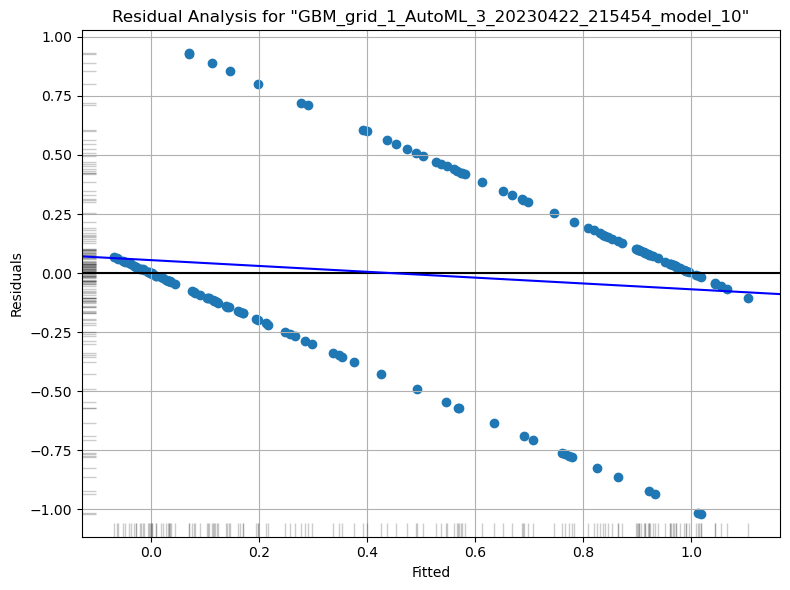

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

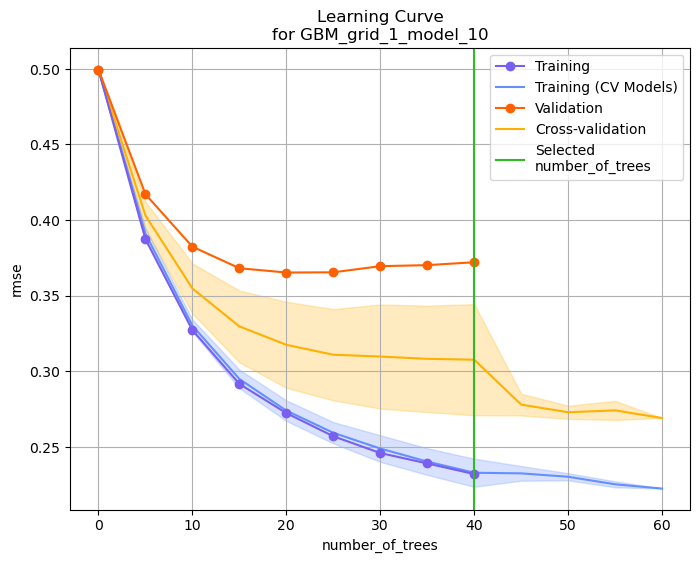

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

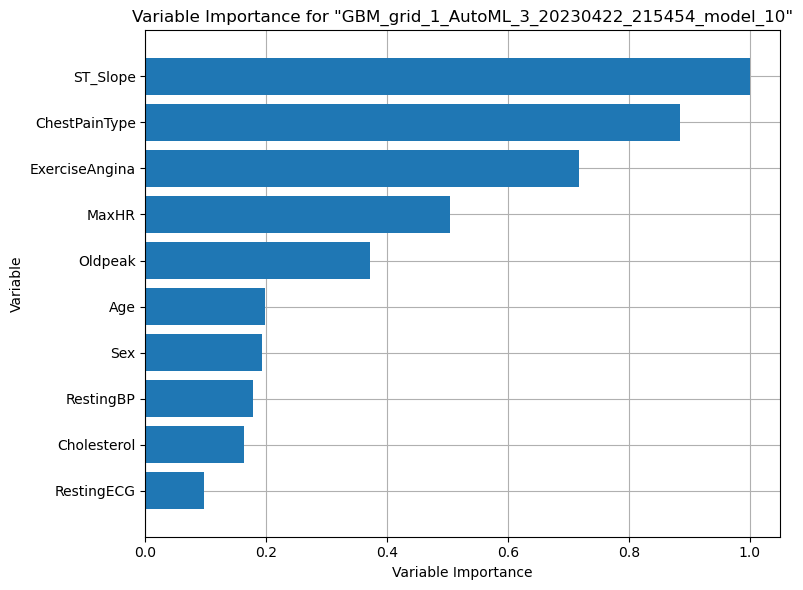

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

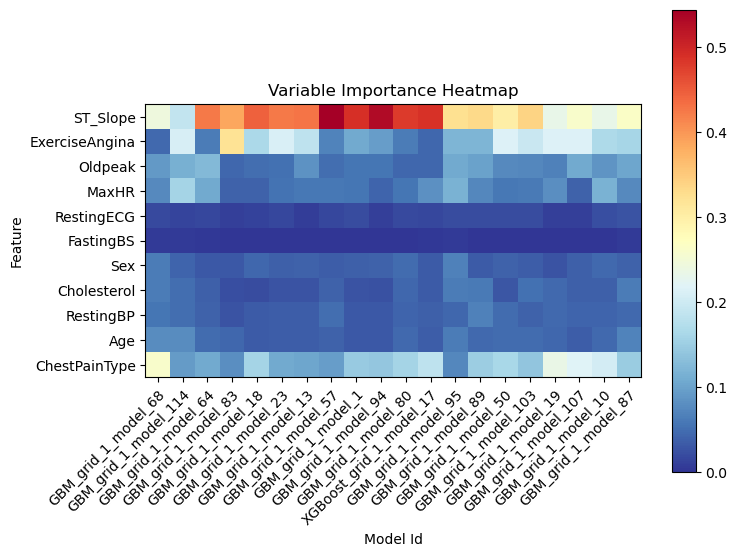

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

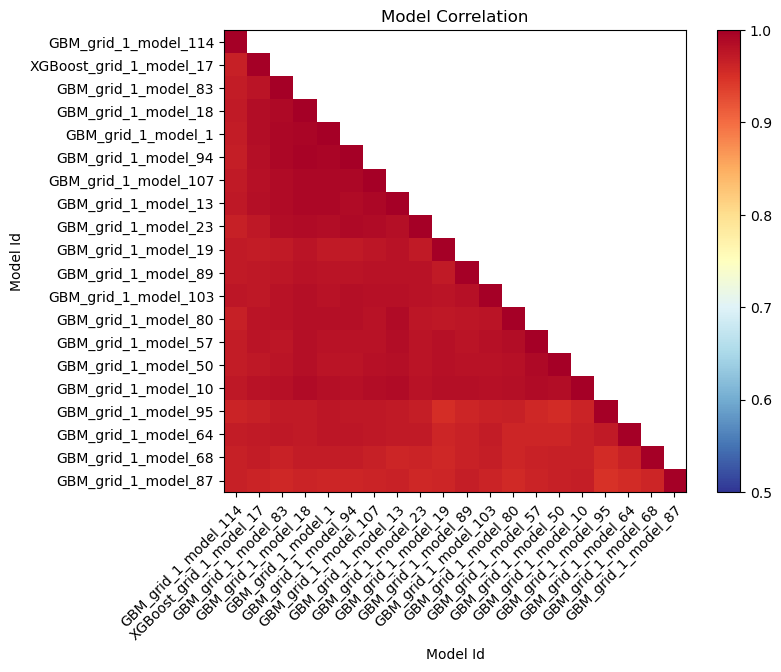

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

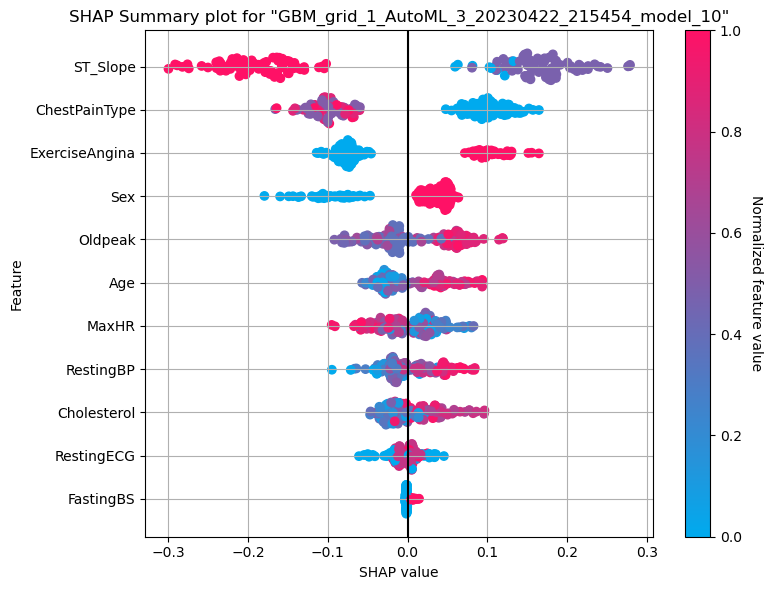

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

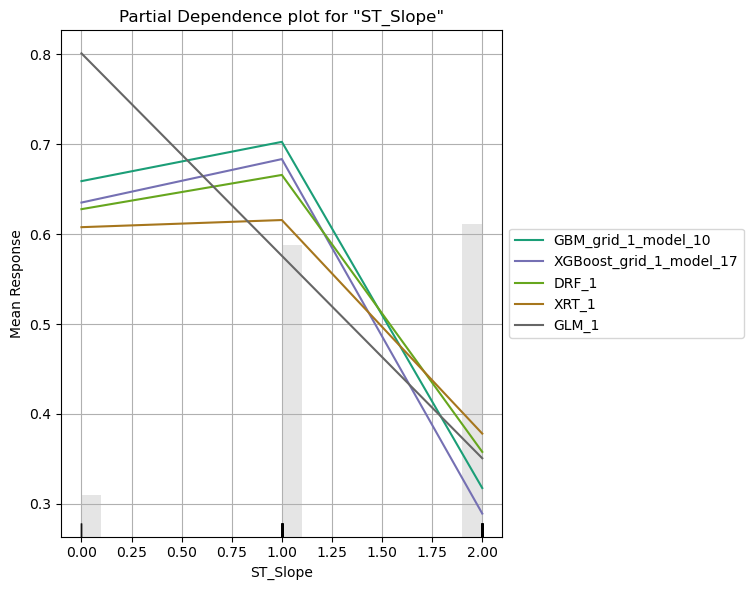

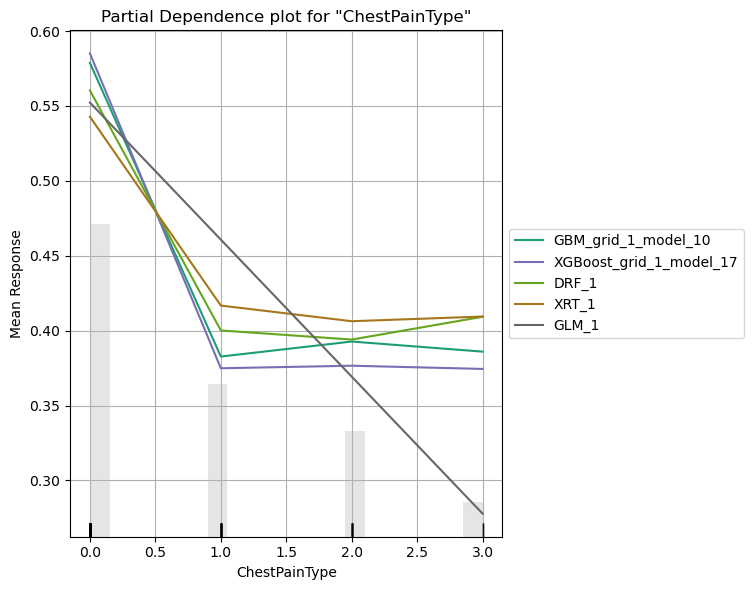

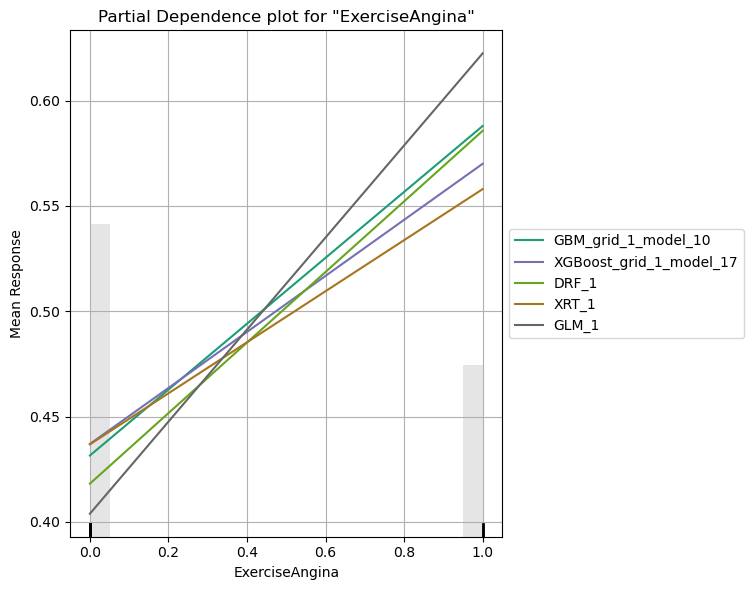

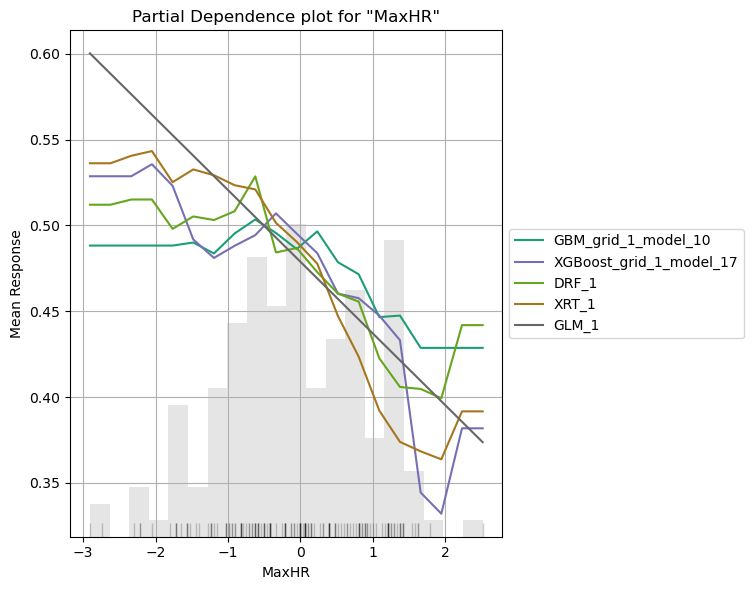

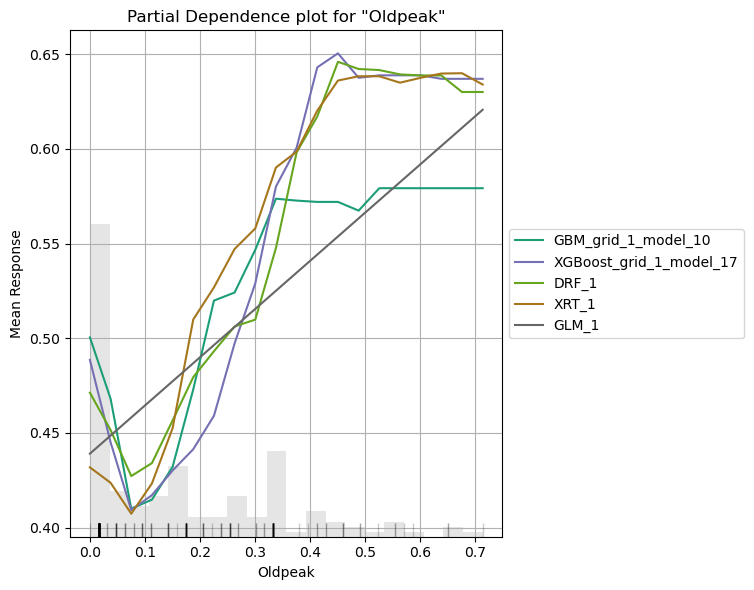

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

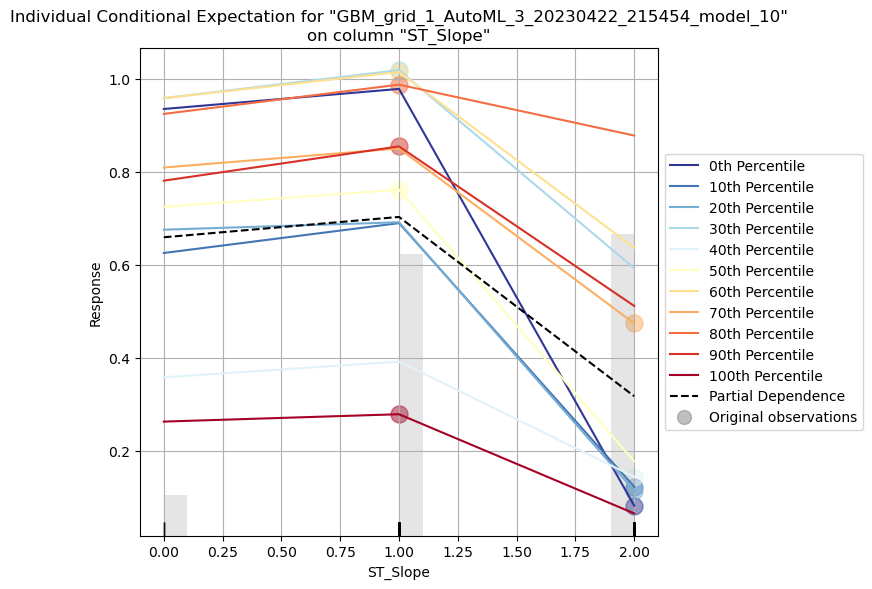

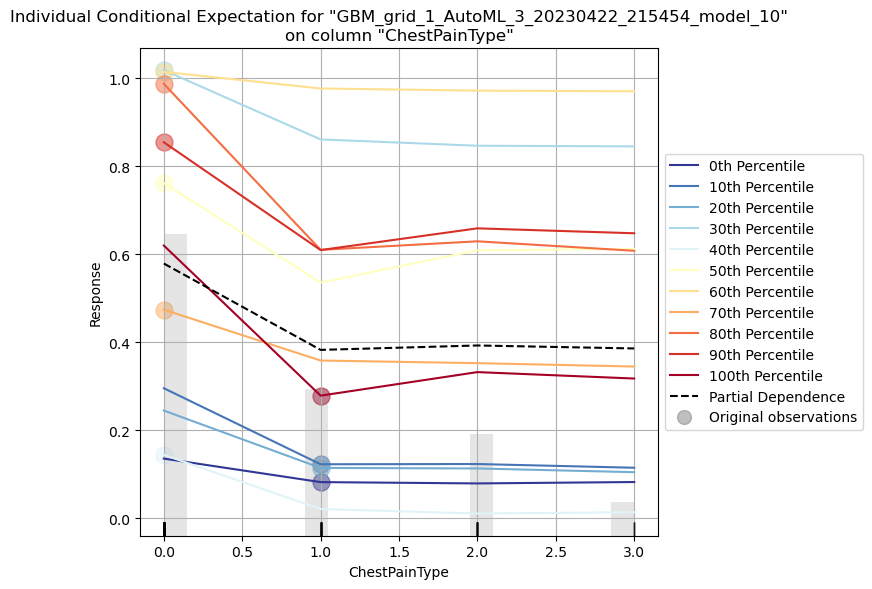

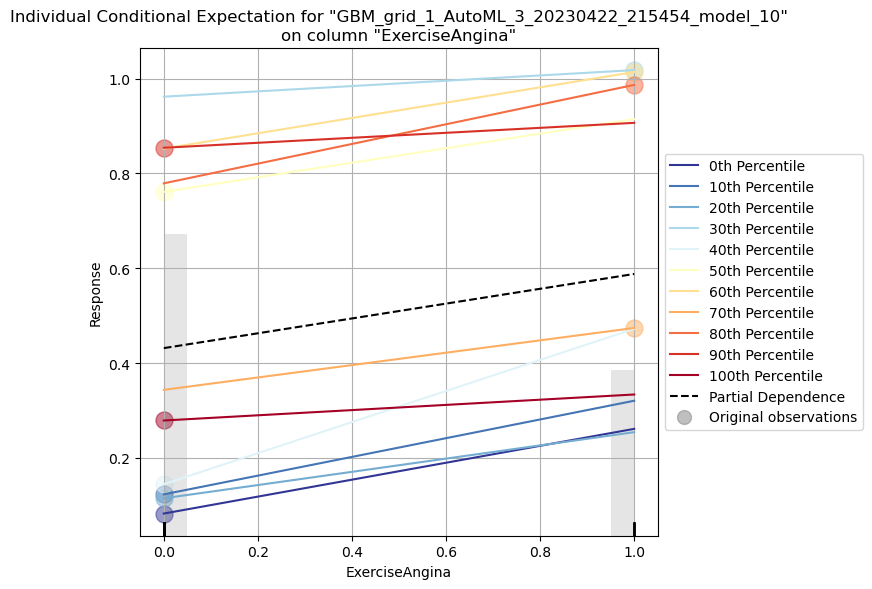

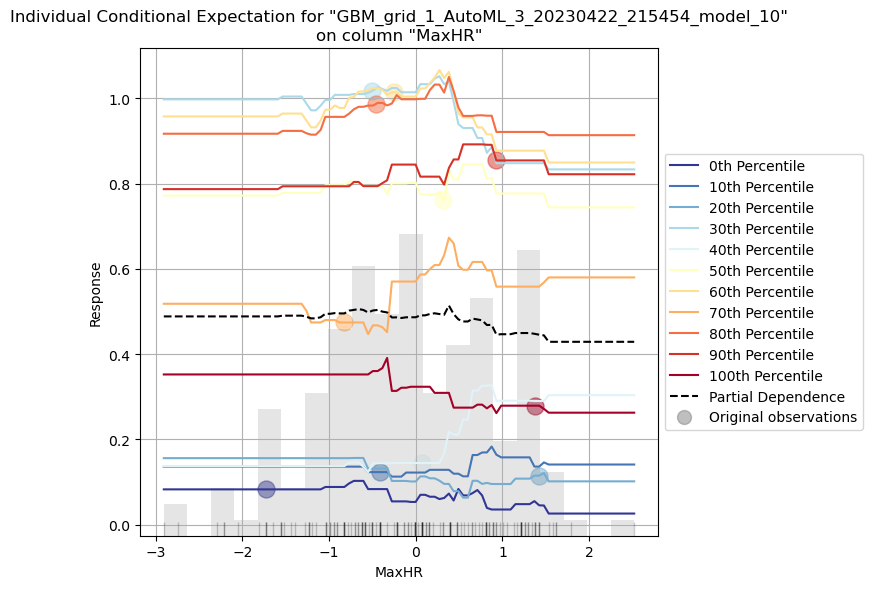

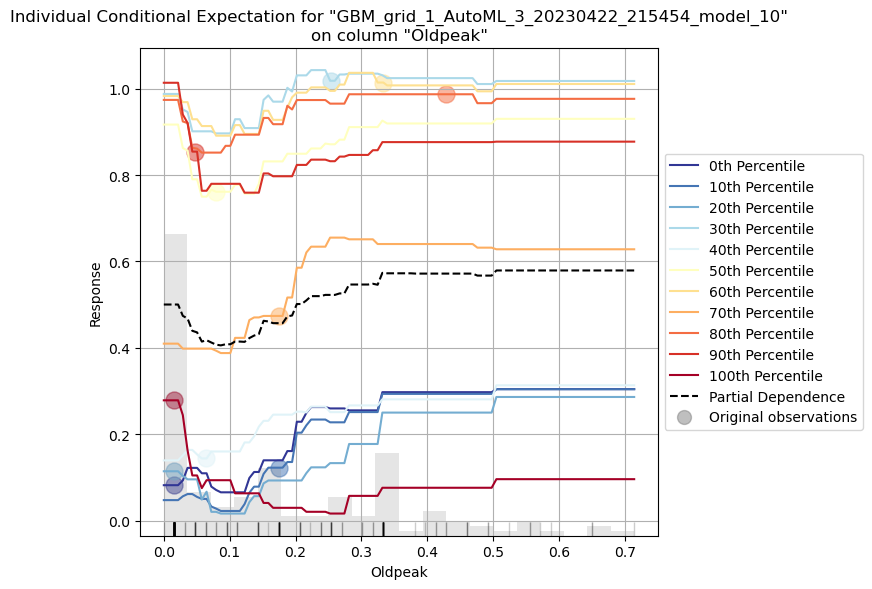

In [142]:
explain_model_test = aml.explain(frame = test, figsize = (8,6))

In [143]:
preds = aml.leader.predict(test)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [144]:
lb = h2o.automl.get_leaderboard(aml, extra_columns = "ALL")
lb

model_id,rmse,mse,mae,rmsle,mean_residual_deviance,training_time_ms,predict_time_per_row_ms,algo
GBM_grid_1_AutoML_3_20230422_215454_model_10,0.308091,0.0949204,0.209269,0.217152,0.0949204,192,0.011759,GBM
GBM_grid_1_AutoML_3_20230422_215454_model_68,0.308114,0.0949344,0.213238,0.217589,0.0949344,81,0.008327,GBM
GBM_grid_1_AutoML_3_20230422_215454_model_103,0.309194,0.0956007,0.213743,0.217888,0.0956007,107,0.009003,GBM
GBM_grid_1_AutoML_3_20230422_215454_model_107,0.309359,0.095703,0.219465,0.218156,0.095703,107,0.008895,GBM
GBM_grid_1_AutoML_3_20230422_215454_model_87,0.309518,0.0958017,0.205168,0.218374,0.0958017,108,0.009178,GBM
GBM_grid_1_AutoML_3_20230422_215454_model_94,0.309621,0.095865,0.216015,0.217944,0.095865,89,0.00777,GBM
GBM_grid_1_AutoML_3_20230422_215454_model_13,0.310714,0.0965435,0.215592,0.218636,0.0965435,169,0.007928,GBM
GBM_grid_1_AutoML_3_20230422_215454_model_18,0.310873,0.0966421,0.216808,0.218786,0.0966421,103,0.00755,GBM
GBM_grid_1_AutoML_3_20230422_215454_model_50,0.311002,0.0967224,0.205978,0.218361,0.0967224,183,0.008936,GBM
GBM_grid_1_AutoML_3_20230422_215454_model_23,0.311114,0.096792,0.21743,0.218813,0.096792,216,0.008063,GBM


In [145]:
m = aml.get_best_model()
m

Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_grid_1_AutoML_3_20230422_215454_model_10


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    40                 40                          11789                  6            7            6.925         11            22            18.825

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 0.0538365640988768
RMSE: 0.23202707621929988
MAE: 0.1530443656868136
RMSLE: 0.16565574024627558
Mean Residual Deviance: 0.0538365640988768

ModelMetricsRegression: gbm
** Reported on validation data. **

MSE: 0.13846438730818836
RMSE: 0.372108031770598
MAE: 0.252138718112543
RMSLE: 0.25818919820766745
Mean Residual Deviance: 0.13846438730818836

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 0.09492037184356558
RMSE: 0.30809149914200096
MAE: 0.2092687991503772
RMSLE: 0.2171518445348914
Mean Residual Deviance: 0.09492037184356558

Cross-Validation Metrics Summary: 
                        mean       sd         cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  ---------  ---------  ------------  ------------  ------------  ------------  ------------
mae                     0.209682   0.0302796  0.181221      0.252072      0.230735      0.193836      0.190547
mean_residual_deviance  0.0961868  0.0259324  0.0724019     0.132219      0.114714      0.0829398     0.0786595
mse                     0.0961868  0.0259324  0.0724019     0.132219      0.114714      0.0829398     0.0786595
r2                      0.613924   0.105293   0.70988       0.467298      0.539027      0.668145      0.685271
residual_deviance       0.0961868  0.0259324  0.0724019     0.132219      0.114714      0.0829398     0.0786595
rmse                    0.307969   0.040955   0.269076      0.363619      0.338694      0.287993      0.280463
rmsle                   0.217332   0.0263977  0.190901      0.25491       0.233192      0.20932       0.198335

Scoring History: 
    timestamp            duration    number_of_trees    training_rmse    training_mae    training_deviance    validation_rmse    validation_mae    validation_deviance
--  -------------------  ----------  -----------------  ---------------  --------------  -------------------  -----------------  ----------------  ---------------------
    2023-04-22 21:55:13  5.724 sec   0                  0.499478         0.498956        0.249478             0.49949            0.498968          0.24949
    2023-04-22 21:55:13  5.761 sec   5                  0.387365         0.376541        0.150051             0.417088           0.401891          0.173962
    2023-04-22 21:55:13  5.787 sec   10                 0.327249         0.297377        0.107092             0.382396           0.340878          0.146227
    2023-04-22 21:55:13  5.811 sec   15                 0.291641         0.241783        0.0850543            0.36814            0.300405          0.135527
    2023-04-22 21:55:13  5.834 sec   20                 0.272346         0.208317        0.0741721            0.365306           0.279256          0.133448
    2023-04-22 21:55:13  5.855 sec   25                 0.257014         0.181886        0.0660561            0.365446           0.264175          0.133551
    2023-04-22 21:55:13  5.877 sec   30                 0.245939         0.166854        0.0604861            0.369507           0.257939          0.136535
    2023-04-22 21:55:13  5.894 sec   35                 0.239053         0.158421        0.0571465            0.370189           0.253271          0.13704
    2023-04-22 21:55:13  5.912 sec   40                 0.232027         0.153044        0.0538366           

In [146]:
m.params.keys()

dict_keys(['model_id', 'training_frame', 'validation_frame', 'nfolds', 'keep_cross_validation_models', 'keep_cross_validation_predictions', 'keep_cross_validation_fold_assignment', 'score_each_iteration', 'score_tree_interval', 'fold_assignment', 'fold_column', 'response_column', 'ignored_columns', 'ignore_const_cols', 'offset_column', 'weights_column', 'balance_classes', 'class_sampling_factors', 'max_after_balance_size', 'max_confusion_matrix_size', 'ntrees', 'max_depth', 'min_rows', 'nbins', 'nbins_top_level', 'nbins_cats', 'r2_stopping', 'stopping_rounds', 'stopping_metric', 'stopping_tolerance', 'max_runtime_secs', 'seed', 'build_tree_one_node', 'learn_rate', 'learn_rate_annealing', 'distribution', 'quantile_alpha', 'tweedie_power', 'huber_alpha', 'checkpoint', 'sample_rate', 'sample_rate_per_class', 'col_sample_rate', 'col_sample_rate_change_per_level', 'col_sample_rate_per_tree', 'min_split_improvement', 'histogram_type', 'max_abs_leafnode_pred', 'pred_noise_bandwidth', 'categor

In [147]:
m.params['model_id']

{'default': None,
 'actual': {'__meta': {'schema_version': 3,
   'schema_name': 'ModelKeyV3',
   'schema_type': 'Key<Model>'},
  'name': 'GBM_grid_1_AutoML_3_20230422_215454_model_10',
  'type': 'Key<Model>',
  'URL': '/3/Models/GBM_grid_1_AutoML_3_20230422_215454_model_10'},
 'input': None}

In [148]:
info = aml.training_info
info

{'creation_epoch': '1682218495',
 'start_epoch': '1682218495',
 'start_XGBoost_def_2': '1682218495',
 'start_GLM_def_1': '1682218495',
 'start_GBM_def_5': '1682218496',
 'start_XGBoost_def_1': '1682218497',
 'start_DRF_def_1': '1682218497',
 'start_GBM_def_2': '1682218498',
 'start_GBM_def_3': '1682218498',
 'start_GBM_def_4': '1682218499',
 'start_XGBoost_def_3': '1682218499',
 'start_DRF_XRT': '1682218499',
 'start_GBM_def_1': '1682218500',
 'start_XGBoost_grid_1': '1682218501',
 'start_GBM_grid_1': '1682218508',
 'start_completion_GBM_grid_1': '1682218520',
 'start_completion_XGBoost_grid_1': '1682218565',
 'stop_epoch': '1682218565',
 'duration_secs': '71'}

In [149]:
info = aml.training_info
info

{'creation_epoch': '1682218495',
 'start_epoch': '1682218495',
 'start_XGBoost_def_2': '1682218495',
 'start_GLM_def_1': '1682218495',
 'start_GBM_def_5': '1682218496',
 'start_XGBoost_def_1': '1682218497',
 'start_DRF_def_1': '1682218497',
 'start_GBM_def_2': '1682218498',
 'start_GBM_def_3': '1682218498',
 'start_GBM_def_4': '1682218499',
 'start_XGBoost_def_3': '1682218499',
 'start_DRF_XRT': '1682218499',
 'start_GBM_def_1': '1682218500',
 'start_XGBoost_grid_1': '1682218501',
 'start_GBM_grid_1': '1682218508',
 'start_completion_GBM_grid_1': '1682218520',
 'start_completion_XGBoost_grid_1': '1682218565',
 'stop_epoch': '1682218565',
 'duration_secs': '71'}

In [150]:
perf = m.model_performance(test)
perf

ModelMetricsRegression: gbm
** Reported on test data. **

MSE: 0.13846438730818836
RMSE: 0.372108031770598
MAE: 0.252138718112543
RMSLE: 0.25818919820766745
Mean Residual Deviance: 0.13846438730818836

In [152]:
perf

ModelMetricsRegression: gbm
** Reported on test data. **

MSE: 0.13846438730818836
RMSE: 0.372108031770598
MAE: 0.252138718112543
RMSLE: 0.25818919820766745
Mean Residual Deviance: 0.13846438730818836